## Основы машинного обучения

Dictionary:

**training set** - примеры, которые система использует для обучения.\
**training instance** или **training sample** - Каждый -- отдельный обучающий пример.\
**training data** - обучающие данные.\
**accuracy** -  конкретная оценка производительности и часто используется в задачах классификации.
**data mining** - применение приемов МО для исследования крупных объемов данных может помочь в обнаружении паттернов, которые не были замечены сразу. Это называется интеллектуальным или глубинным анализом данных.

#### Обучение с учителем и без учителя 

**Обучение с учителем**.\
При обучении с учителем обучающие данные, поставляемые вами алгоритму, включают желательные решения, называемые метками (**label**).

Прогнозирование целевого числового значения, такого как цена автомобиля, располагая набором характеристик или\
признаков (пробег, возраст, марка и т.д.), которые называются прогнозаторами (**predictor**).\
Задачу подобного рода именуют **регрессией**.

Чтобы обучить систему, вам необходимо предоставить ей **много примеров** автомобилей, включая их **прогнозаторы** и **метки** (т.е. цены).

---
>В машинном обучении **атрибут** представляет собой тип данных (например, "Пробег"), тогда как **признак** \
в зависимости от контекста имеет несколько смыслов, но в большинстве случаев\
подразумевает атрибут плюс его значение (скажем, "Пробег = 15 ООО").
---

**Обучение без учителя**.
При обучении без учителя, обучающие данные не помечены. Система пытается обучаться без учителя. 

Еще одной важной задачей обучения без учителя является обнаружение аномалий (**anomaly detection**)\
например, выявление необычных транзакций на кредитных картах в целях предотвращения мошенничества,\
отлавливание производственных дефектов или автоматическое удаление выбросов \
из набора данных перед его передачей другому алгоритму обучения. Система обучалась на нормальных образцах, \
и когда она видит новый образец, то может сообщить, выглядит он как нормальный или вероятно представляет собой аномалию/

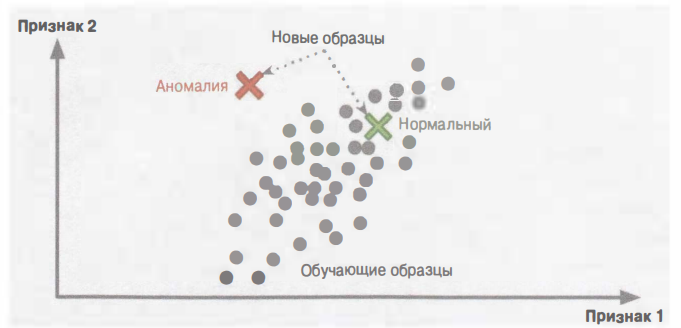

Наконец, в число распространенных задач входит обучение ассоциативным \
правилам (**association rule learning**), цель которого заключается в проникновении внутрь крупных объемов данных \
и обнаружении интересных зависимостей между атрибутами. \
Например, предположим, что вы владеете супермаркетом. Запуск ассоциативного правила на журналах продаж может \
выявить, что люди, покупающие соус для барбекю и картофельные чипсы, \
также склонны приобретать стейк. 

---
**Обучение с подкреплением**\
Обучающая система, которая в данном контексте называется **агентом**, **может наблюдать\
за средой**, **выбирать и выполнять действия**, **выдавая в ответ награды (или\
штрафы в форме отрицательных наград)**.\
Затем она должна самостоятельно узнать, в чем заключается наилучшая стратегия,\
называемая **политикой**, чтобы со временем получать наибольшую награду. \

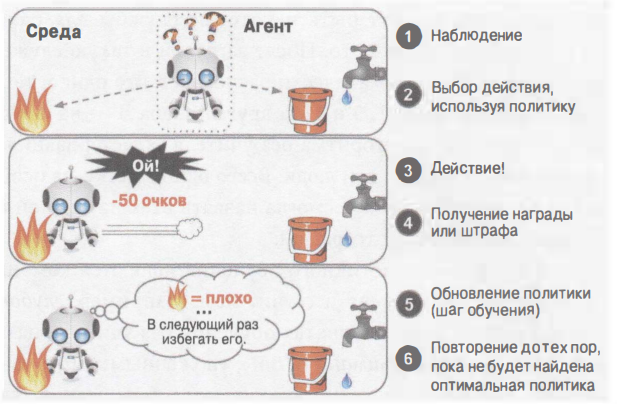

---
**etc ...**

In [1]:
import os
datapath = os.path.join("datasets", "lifesat", "")

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

## Load the data

In [12]:
oecd_bli = pd.read_csv("./data/handson-ml-master/lifesat/oecd_bli_2015.csv", thousands=',')
#oecd_bli.head(5)

In [13]:
gdp_per_capita = pd.read_csv("./data/handson-ml-master/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
# gdp_per_capita.head(5)

## Prepare the data

In [14]:
# This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. 
# It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

def prepare_country_stats(oecd_bli, gdp_per_capita):
    #get the pandas dataframe of GDP per capita and Life satisfaction
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

In [15]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

## Visualize the data

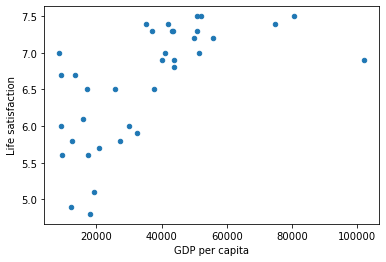

In [16]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

## Select a linear model

In [17]:
model = sklearn.linear_model.LinearRegression()

## Train the model

In [18]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make a prediction for Cyprus

In [19]:
X_new = [[22506]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[5.96242338]]

[[6.28465901]]
